# Filtrage 

### Rita ABUBAKER et Anna VAN ELST

#### Importations

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.cluster import KMeans



#### Données

In [229]:
#On suppose que τ suit une loi exponentielle de paramètre μ = 0, 2

mu = 0.2

#On suppose que a = 5 et b = 10

a = 5
b = 10




In [231]:
def erreur_relative(val_th, val_exp):
    if val_exp == None : 
        return None
    return abs((val_th-val_exp)* 100/val_th)





### Question 1 : calcul de la fonction h 

Si $ \tau $ est une variabe aléatoire positive de fonction de répartition F et de densité f, alors on a : 
$$ h(s) = \frac{f(s)}{1 - F(s)} $$

On suppose que τ suit une loi exponentielle de paramètre $ \mu = 0,2 $, alors : 

$ f(s) = \mu\exp^{-\mu s} $ si $ s \geq 0 $ et 0 sinon.

Et $ F(s) = 1 - \exp^{-\mu s} $ si $ s \geq 0 $ et 0 sinon.

Par conséquent, $ h(s) = \mu $ si $ s \geq 0 $ et 0 sinon


In [232]:
h = mu




### Question 2 : Simulation de N sur l'intervalle [0,10]

In [237]:
tau = np.random.exponential(1/mu) #Réalisation d'une Exponentielle de mu

print("La valeur de tau est", tau)




La valeur de tau est 3.2018523965540213


In [238]:
def simulation_N(tau, mu=0.2, a=5, b=10, T=10):
    """Simulation du processus N sur l'intervalle [0,T]

    Parametres
    ----------
    tau: valeur de l'instant où la trajectoire change de pente (d'intensité)
    mu : paramètre d'échelle de la loi exponentielle de tau
        de type float
    a : intensite du premier processus
    b : intensite du second processus
    T : taille de l'intervalle de temps
    
    Retun
    ----------
    n : longueur de la trajectoire
    traj : valeurs de la trajectoire
    indice_changement : indice de changement réel du processus

    
    """
    
    t = 0
    n= 0
    
    traj = []
    N = [] 
    
    while (t<T and t<tau):
        x = np.random.exponential(1/a) #Réalisation d'une Exponentielle de a
        traj.append(t)
        N.append(n)
        t += x
        n +=1
        indice_changement=n
        
        
        
    while (t<T and t>tau):
        x = np.random.exponential(1/b) #Réalisation d'une Exponentielle de b
        traj.append(t)
        N.append(n)
        t += x
        n +=1
        
    print("La valeur de tau :" ,tau)
    print("L'indice de changement est :", indice_changement)
    print(traj[indice_changement-1])
    
    return N, traj, indice_changement

La valeur de tau : 3.2018523965540213
L'indice de changement est : 10
3.1418923044059364


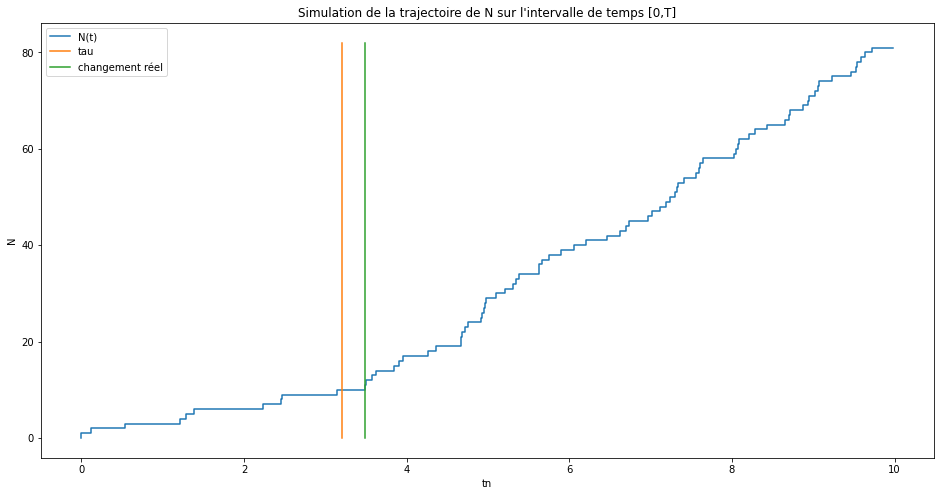

In [247]:
N, traj, ic = simulation_N(tau)
real_change = traj[ic]
plt.figure(figsize=(16, 8))
plt.step(traj, N, label = 'N(t)')
plt.plot([tau,tau],[0,len(N)], label="tau")
plt.plot([real_change,real_change],[0,len(N)], label="changement réel")
plt.xlabel('tn')
plt.ylabel('N')
plt.legend()
plt.title("Simulation de la trajectoire de N sur l'intervalle de temps [0,T]")
plt.show()

### Question 3 : Représentation de $ Z\hat (s) $ pour cette trajectoire et estimation de $ \tau $

On a  sur l'intervalle $[T_n,T_{n+1}]$, $ \hat Z (t) =  \hat Z (T_n) + \int_{T_n}^{t} (h(s) - (b-a)\hat Z (s))(1 - \hat Z (s))ds $

Dans notre cas, h(s) = $ \mu $, donc on a :

$ \hat Z (t) =  \hat Z (T_n) + \int_{T_n}^{t} (\mu - (b-a)\hat Z (s))(1 - \hat Z (s))ds $

Cela revient à résoudre l'équation différentielle suivante, avec $\hat Z(t) = y(t)$ sur l'intervalle $[T_n,T_{n+1}]$ : 
$y'(t) = f(t,y(t)) = (\mu-(b-a)y(t))(1-y(t))$
avec la condition initiale : $y(T_{n})=\hat{Z}(T_{n}).$

De plus, au moment du n-ième saut, on a la formule suivant : 
$$\hat{Z}(T_{n}) - \hat{Z}(T_{n}^{-}) = \frac{(b-a)\hat{Z}(T_{n}^{-})(1-\hat{Z}(T_{n}^{-}))}{a + (b-a)\hat{Z}(T_{n}^{-})}$$

In [248]:
def f(y,t,a=5,b=10,mu=0.2):
    return (mu-(b-a)*y)*(1-y)

def solve_n(n, y0, number_points=10):
    t_n = np.linspace(traj[n],traj[n+1],number_points, endpoint = False)
    solution_n = odeint(f, y0, t_n).reshape(-1)
    return solution_n, t_n

def Z_hat_sim(traj, N):
    Z_hat = [0]
    T = [0]
    for n in range(0,len(N)-1):
        y0 = Z_hat[-1] + (b-a)*Z_hat[-1]*(1-Z_hat[-1])/(a+(b-a)*Z_hat[-1]) 
        solution_n, t_n = solve_n(n,y0)
        Z_hat = np.concatenate((Z_hat,solution_n.reshape(-1)))
        T = np.concatenate((T,t_n))
    return Z_hat, T

def estim_Z_tau(Z_hat):
    if np.where(Z_hat>=0.5)[0].size == 0:
        return None
    return T[np.where(Z_hat>=0.5)[0][0]]

Nous avons fixé la valeur de Z_hat pour laquelle on considère qu'il ya eu basculement de régime à 0.5. Cette valeur a été approximée expérimentalement.

In [249]:
Z_hat, T = Z_hat_sim(traj, N)

L'estimation de tau est  3.9498361133196367
La valeur réelle de tau est 3.2018523965540213
L'erreur relative est de 23.36096809367694 %


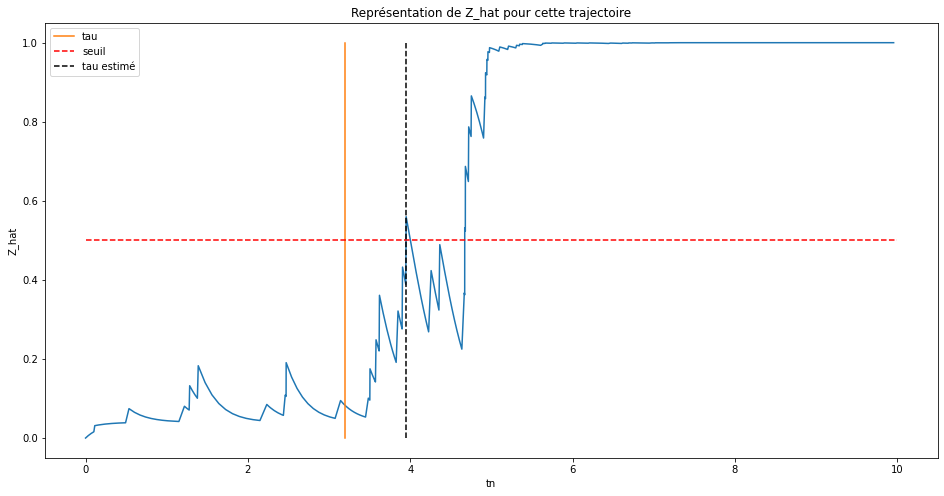

In [250]:
tau_Z = estim_Z_tau(Z_hat)
er = erreur_relative(tau, tau_Z)

print("L'estimation de tau est ",tau_Z)
print("La valeur réelle de tau est", tau)
print("L'erreur relative est de", er , '%')

plt.figure(figsize = (16,8))

plt.plot(T,Z_hat)
plt.plot([tau,tau],[0,max(Z_hat)], label="tau")
plt.plot([0,10],[0.5,0.5], "--",color="red",label="seuil")
plt.plot([tau_Z,tau_Z],[0,max(Z_hat)], "--",color="black", label="tau estimé")

plt.xlabel('tn')
plt.ylabel('Z_hat')
plt.legend()

plt.title("Représentation de Z_hat pour cette trajectoire")

plt.show()

### Question 4 : L'estimation de $ \tau $ par K-means

Notre première initiative a été de tester k-means sur les points de la trajectoire. Or, nous avons eu des résultats très peu satisfaisants et cela vient du fait que la valeur des $ t_{i} $ ne représente pas vraiment le processus et du coup ne peut pas indiquer le changement de régime.

In [251]:
def kmeans0_tau(traj):
    
    traj_2D = np.array(traj).reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, n_init=10, init='k-means++').fit(traj_2D)
    
    labels = kmeans.labels_
    label_initial = labels[0]
    
    print(labels)
    
    for i in range(1, len(traj)) :
            if labels[i] != label_initial : 
                id_saut = i-1
                break
    print(id_saut)

    tau = (traj[id_saut] + traj[id_saut + 1])/2
        
    print("L'indice de saut est ", id_saut)
    print("L'estimation de tau par K-means est :" , tau)
    
    return traj_2D, labels, tau

traj_2D, labels, tau_kmeans_i = kmeans0_tau(traj)

print("l'erreur relative entre le Tau réel et celui prédit par le K-means est de ", erreur_relative(tau, tau_kmeans_i), "%" )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
38
L'indice de saut est  38
L'estimation de tau par K-means est : 5.977338202342903
l'erreur relative entre le Tau réel et celui prédit par le K-means est de  86.68375246704018 %


Or, pour pouvoir détecter un changement de régime, il faut essayer de détecter un changement d'intensité $ \lambda $ et non de valeur des $ t_i $ car un processus de poisson est entièrement déterminé par son intensité.

$ N_t $ peut s'écrire comme une somme de v.a.r. indépendantes : $ N_t = N_t − N_{[t]} + \sum_{i=0}^{[t]-1}(N_{i+1} − N) $ . On peut alors montrer le résultat suivant : 
$ \frac{N(t)}{t}\underset{t\to +\infty}{\longrightarrow} \lambda $ p.s. 
et par conséquent : $ \frac{i}{t_i}\underset{i\to +\infty}{\longrightarrow} \lambda $ p.s.

Il serait donc intéressant de comparer les "pentes" de deux points qui se suivent : $ \frac{N(t_{i-1})}{t_{i-1}} = \frac{i-1}{t_{i-1}}  $ avec $ \frac{N(t_{i})}{t_{i}} = \frac{i}{t_{i}} $ mais aussi la différence de la pente d'un point avec l'intensité a (ou avec l'intensité b)

In [252]:
def pentes(traj, a = 5, b = 10):
    
    diff_pentes = []
            
    for i in range(1,len(traj)-1):                                       # on commence par 1 car sinon division par 0
        diff_pentes.append([i/traj[i]-(i+1)/traj[i+1],                   # changement de pente entre deux points successifs
                       i/traj[i] - a])                                   # comparaison de la pente avec a
             
    return np.array(diff_pentes, dtype=object)
    
diff_pentes = pentes(traj)

In [255]:
def kmeans_tau(diff_pentes) : 
    """Application de kmeans aux différences de pentes et prédiction de tau

    Parametres
    ----------
    diff_pentes : array de shape (len(traj)-1, 2) contenant la différence entre la pente de deux points successifs,
                  la différence entre la pente d'un point et a, 
    Retun
    ----------
    labels : liste de catégorization des éléments de diff_pentes en 0 et 1
    tau_kmeans : prédiction de tau en utilisant kmeans
    
    """
    kmeans = KMeans(n_clusters=2, n_init=10, init='k-means++').fit(diff_pentes)
    
    labels = kmeans.labels_
    
    print(labels)
    
    
    id_saut = int(np.min([np.max(np.where(labels==0)[0]), np.max(np.where(labels==1)[0])])/2)
    
    # l'indice de saut a été choisi comme la moitié du plus petit entre les indices maximum entre 0 et 1.
    # On a trouvé que le changement peut être detecté bien après Tau d'où la divison par deux.
    # On a aussi essayé en prenant l'indice où le label change mais des fois il y'a du 
    # mis-labelling au début des labels, par exemple 0100000011111 et du coup ça engendre des erreurs.    

    tau_kmeans = (traj[id_saut] + traj[id_saut + 1])/2
    
    # On prend la moyenne entre le temps de l'indice de saut et celui de l'indice de saut + 1

    
    print("L'indice de saut est ", id_saut)
    print("L'estimation de tau par K-means est :" , tau_kmeans)
    
    return labels, tau_kmeans

In [256]:
labels, tau_kmeans = kmeans_tau(diff_pentes)
print("l'erreur relative entre le Tau réel et celui prédit par le K-means est de ", erreur_relative(tau, tau_kmeans), "%" )

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
L'indice de saut est  13
L'estimation de tau par K-means est : 3.7353718489656256
l'erreur relative entre le Tau réel et celui prédit par le K-means est de  16.662837205918738 %


### Question 5 : Comparaison des différences de résultat, l'efficacité  et la robustesse des deux méthodes

#### L'influence des valeurs de a et b sur la précision et la robustesse des méthodes 

D'abord, on va comparer l'influence de l'écart entre a et b sur la précision des trois méthodes précédents. Nous avons alors fixé b à 10 et nous avons pris 15 valeurs de a entre 1 et 9

In [257]:
def err_abs(tau_th, tau_c):
    
    # On a ajouté le cas de tau_c = None car parfois la fonction estim_Z_tau ne trouve pas d'indice où Z chapeau est supérieure 
    # à 0.5 et cela engendre des erreurs quand on essaye de trouve le tau estimé par Z chapeau.
    # On a mis le default à 10 car on a pensé que c'est le maximum d'erreur absolue qu'il peut y avoir
    
    if tau_c == None : 
        return 10
    
    return abs(tau_th-tau_c)

In [258]:
valeurs_a = np.linspace(1,9,15) 
b = 10

In [269]:
%%capture 
#Pour enlever les prints

erreur_absolue_Z = []
erreur_absolue_kmeans0 = []
erreur_absolue_kmeans = []
    
for a_j in valeurs_a :
    

    erreur_absolue_Z_j = []
    erreur_absolue_kmeans0_j = [] 
    erreur_absolue_kmeans_j = [] 
    
    for i in range(300) :
    
        N, traj, indice_changement = simulation_N(tau, a=a_j, b=10, T=10)
        Z_h, T = Z_hat_sim(traj, N)
        tau_Z = estim_Z_tau(Z_h)
    
        tau_kmeans0 = kmeans0_tau(traj)[2]
    
        diff_pentes = pentes(traj)
        labels, tau_kmeans = kmeans_tau(diff_pentes)
    
        erreur_absolue_Z_j.append(err_abs(tau , tau_Z))
        erreur_absolue_kmeans_j.append(err_abs(tau , tau_kmeans))
        erreur_absolue_kmeans0_j.append(err_abs(tau , tau_kmeans0))

    erreur_absolue_Z.append(np.mean(erreur_absolue_Z_j))
    erreur_absolue_kmeans.append(np.mean(erreur_absolue_kmeans_j))
    erreur_absolue_kmeans0.append(np.mean(erreur_absolue_kmeans0_j))
   

[]

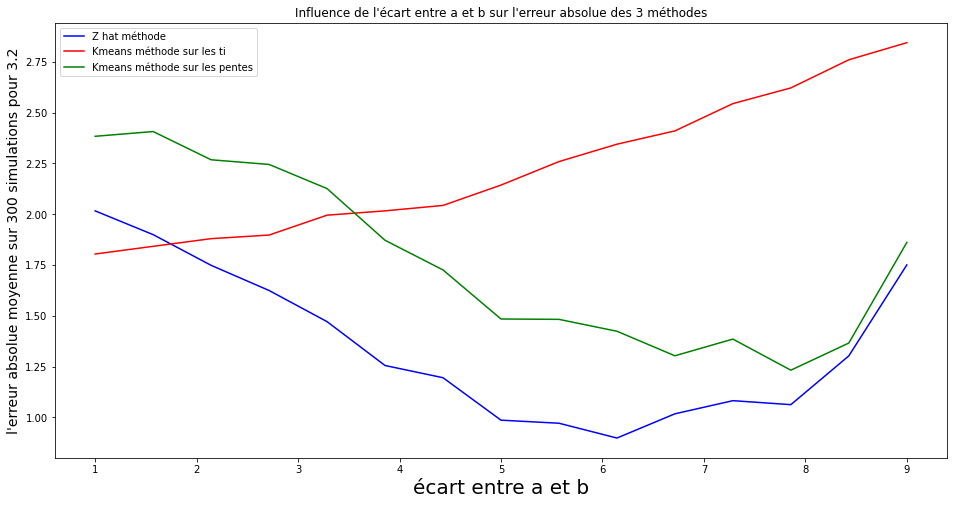

In [270]:
plt.figure(figsize = (16,8))
plt.plot(b-valeurs_a, erreur_absolue_Z, label = "Z hat méthode", color = 'blue')
plt.plot(b-valeurs_a, erreur_absolue_kmeans0, label = "Kmeans méthode sur les ti", color = 'red')
plt.plot(b-valeurs_a, erreur_absolue_kmeans, label = "Kmeans méthode sur les pentes", color = 'green')

plt.xlabel("écart entre a et b",  fontsize=20)
plt.ylabel("l'erreur absolue moyenne sur 300 simulations pour "  + str(round(tau, 2)),  fontsize=14)
plt.legend()
plt.title("Influence de l'écart entre a et b sur l'erreur absolue des 3 méthodes")
plt.plot()

D'abord, on remarque comme on avait suggéré que la méthode de kmeans avec les $ t_i $ ne marche pas bien. 
Ensuite, pour les deux autres méthodes, celle de $ \hat Z  $ est globalement plus efficace que la méthodes de Kmeans sur les pentes même si cette dernière marche assez bien. 


L'écart optimal entre a et b pour la précision des méthodes se situe entre 5 et 7. Avant un écart de 7, l'erreur absolue diminue quand l'écart augmente, cela est intuitif car plus il y a une différence entre a et b, plus les processus de Poisson $ N_a $ et $ N_b $ se distinguent facilement.

#### L'influence de $ \tau $  sur la précision des méthodes 

Maintenant, nous allons comparer l'influence de $ \tau $ sur l'éfficacité des méthodes. Nous prenons 20 valeurs de $ \tau $ entre 1 et 10 et nous simulons le processus plusieurs fois pour chaque valeur de $ \tau $ afin de calculer l'erreur absolue moyenne.

In [271]:
%%capture

valeurs_tau = np.linspace(1,10,20)

erreur_absolue_Z = []
erreur_absolue_kmeans0 = []
erreur_absolue_kmeans = []
    
    
for tau_j in valeurs_tau :
    
    erreur_absolue_kmeans0_j = [] 

    
    for i in range(100) :
    
        N, traj, indice_changement = simulation_N(tau_j, a=5, b=10, T=10)
        Z_h, T = Z_hat_sim(traj, N)
        tau_Z = estim_Z_tau(Z_h)
        taus_Z.append(tau_Z)
        
        tau_kmeans0 = kmeans0_tau(traj)[2]

        
        diff_pentes = pentes(traj)
        labels, tau_kmeans = kmeans_tau(diff_pentes)
        taus_kmeans.append(tau_kmeans)
        
        erreur_absolue_Z_j.append(err_abs(tau_j , tau_Z))
        erreur_absolue_kmeans_j.append(err_abs(tau_j , tau_kmeans))
        erreur_absolue_kmeans0_j.append(err_abs(tau_j , tau_kmeans0))

    
    erreur_absolue_Z.append(np.mean(erreur_absolue_Z_j))
    erreur_absolue_kmeans.append(np.mean(erreur_absolue_kmeans_j))
    erreur_absolue_kmeans0.append(np.mean(erreur_absolue_kmeans0_j))


[]

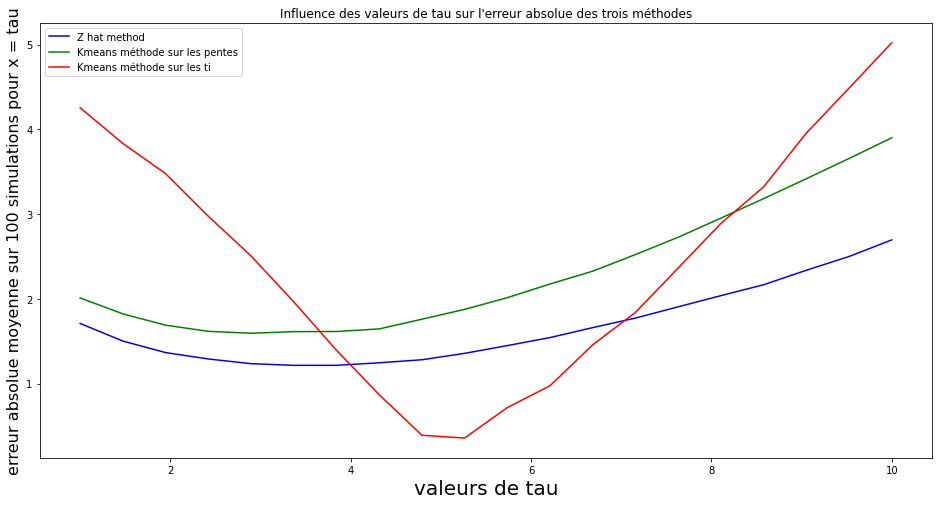

In [272]:
plt.figure(figsize = (16,8))
plt.plot(valeurs_tau, erreur_absolue_Z, label = "Z hat method", color = 'blue')
plt.plot(valeurs_tau, erreur_absolue_kmeans, label = "Kmeans méthode sur les pentes", color = 'green')
plt.plot(valeurs_tau, erreur_absolue_kmeans0, label = "Kmeans méthode sur les ti", color = 'red')

plt.xlabel("valeurs de tau",  fontsize=20)
plt.ylabel("erreur absolue moyenne sur 100 simulations pour x = tau",  fontsize=16)
plt.title("Influence des valeurs de tau sur l'erreur absolue des trois méthodes")
plt.legend()
plt.plot()

Encore une fois, la méthode de Kmeans sur les $ t_i $  ne marche pas bien sur la majorité des valeurs de $ \tau $ mais semble donner des bons résultats pour un $ \tau $ compris entre 4 et 6 .
Pour les deux autres méthodes, leur précision reste assez stable pour les valeurs de $ \tau $ mais la précision reste meilleure
pour des valeurs de $ \tau $ autour de 3

#### L'influence de la taille de l'intervalle de temps sur le précision des méthodes

Ensuite, nous allons étudier l'influence de la taille de l'intervalle de temps sur la précision des trois méthodes. Nous prenons 20 valeurs de T entre 5 et 50.

In [273]:
%%capture

tau = 3.5

valeurs_T = np.linspace(5,50,20)

erreur_absolue_Z = []
erreur_absolue_kmeans0 = []
erreur_absolue_kmeans = []
    
    
for T_j in valeurs_T :
    
    erreur_absolue_kmeans0_j = [] 

    
    for i in range(100) :
    
        N, traj, indice_changement = simulation_N(tau, a=5, b=10, T=T_j)
        Z_h, T = Z_hat_sim(traj, N)
        tau_Z = estim_Z_tau(Z_h)
        taus_Z.append(tau_Z)
        
        tau_kmeans0 = kmeans0_tau(traj)[2]

        
        diff_pentes = pentes(traj)
        labels, tau_kmeans = kmeans_tau(diff_pentes)
        taus_kmeans.append(tau_kmeans)
        
        erreur_absolue_Z_j.append(err_abs(tau , tau_Z))
        erreur_absolue_kmeans_j.append(err_abs(tau , tau_kmeans))
        erreur_absolue_kmeans0_j.append(err_abs(tau , tau_kmeans0))

    
    erreur_absolue_Z.append(np.mean(erreur_absolue_Z_j))
    erreur_absolue_kmeans.append(np.mean(erreur_absolue_kmeans_j))
    erreur_absolue_kmeans0.append(np.mean(erreur_absolue_kmeans0_j))


[]

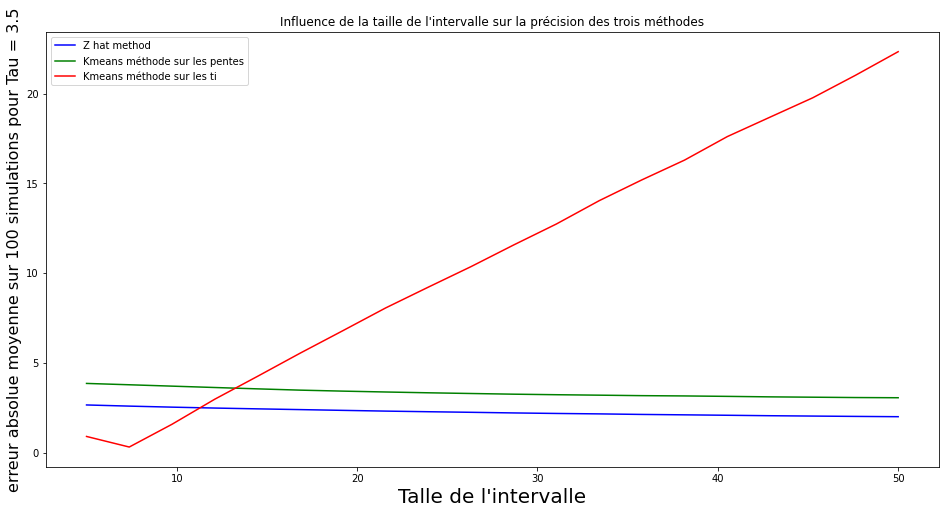

In [274]:
plt.figure(figsize = (16,8))
plt.plot(valeurs_T, erreur_absolue_Z, label = "Z hat method", color = 'blue')
plt.plot(valeurs_T, erreur_absolue_kmeans, label = "Kmeans méthode sur les pentes", color = 'green')
plt.plot(valeurs_T, erreur_absolue_kmeans0, label = "Kmeans méthode sur les ti", color = 'red')

plt.xlabel("Talle de l'intervalle",  fontsize=20)
plt.ylabel("erreur absolue moyenne sur 100 simulations pour Tau = 3.5",  fontsize=16)
plt.title("Influence de la taille de l'intervalle sur la précision des trois méthodes")

plt.legend()
plt.plot()

La précision des méthodes de $ \hat Z $ et de Kmeans sur les pentes reste consistante. Celle de kmeans sur les $ t_i $ devient de plus en plus instable quand la taille de l'intervalle de temps augmente prouvant encore une fois que ce n'est pas une méthode robuste.

#### Modification du modèle d'arrivée sur le précision des méthodes

Finalement, nous allons remplacer la loi exponentielle qui régit le processus de Poisson par une loi Gamma de paramètres $ \alpha = 2 $ et $ \beta = $  a ou b. Nous allons alors étudier l'influence de ce changement de modèle sur la précision de nos méthodes.

In [276]:
def simulation_N_gamma(tau, mu=0.2, a=5, b=15, T=10):
    """Simulation du processus N sur l'intervalle [0,T]

    Parametres
    ----------
    tau: valeur de l'instant où la trajectoire change de pente (d'intensité)
    mu : paramètre d'échelle de la loi exponentielle de tau
        de type float
    a : intensite du premier processus
    b : intensite du second processus
    T : taille de l'intervalle de temps
    
    Retun
    ----------
    n : longueur de la trajectoire
    traj : valeurs de la trajectoire
    indice_changement : indice de changement réel du processus

    
    """
    
    t = 0
    n= 0
    
    traj = []
    N = [] 
    
    while (t<T and t<tau):
        x = np.random.gamma(2,1/a) #Réalisation d'une Gamma de (2,a)
        traj.append(t)
        N.append(n)
        t += x
        n +=1
        indice_changement=n
        
        
        
    while (t<T and t>tau):
        x = np.random.gamma(2,1/b) #Réalisation d'une Gamma de  (2,b)
        traj.append(t)
        N.append(n)
        t += x
        n +=1
        
    print("La valeur de tau :" ,tau)
    print("L'indice de changement est :", indice_changement)
    print(traj[indice_changement-1])
    
    return N, traj, indice_changement

In [277]:
N, traj, indice_changement = simulation_N_gamma(tau)

La valeur de tau : 3.5
L'indice de changement est : 7
3.3118922954831413


La valeur de tau : 3.5
L'indice de changement est : 26
3.337715558806681


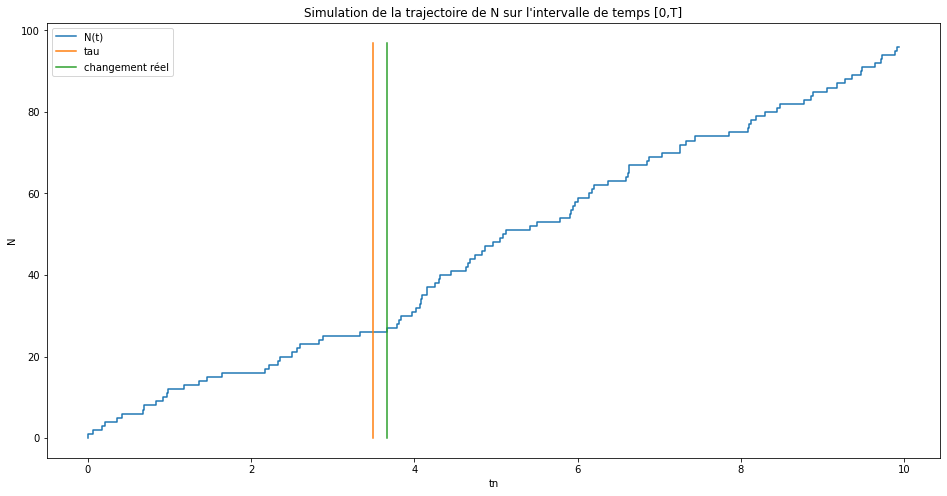

In [278]:
N, traj, ic = simulation_N(tau)
real_change = traj[ic]
plt.figure(figsize=(16, 8))
plt.step(traj, N, label = 'N(t)')
plt.plot([tau,tau],[0,len(N)], label="tau")
plt.plot([real_change,real_change],[0,len(N)], label="changement réel")
plt.xlabel('tn')
plt.ylabel('N')
plt.legend()
plt.title("Simulation de la trajectoire de N sur l'intervalle de temps [0,T]")
plt.show()

In [280]:
%%capture 
#Pour enlever les prints

erreur_absolue_Z = []
erreur_absolue_kmeans0 = []
erreur_absolue_kmeans = []
    
for a_j in valeurs_a :
    

    erreur_absolue_Z_j = []
    erreur_absolue_kmeans0_j = [] 
    erreur_absolue_kmeans_j = [] 
    
    for i in range(100) :
    
        N, traj, indice_changement = simulation_N_gamma(tau, a=a_j, b=10, T=10)
        Z_h, T = Z_hat_sim(traj, N)
        tau_Z = estim_Z_tau(Z_h)
    
        tau_kmeans0 = kmeans0_tau(traj)[2]
    
        diff_pentes = pentes(traj)
        labels, tau_kmeans = kmeans_tau(diff_pentes)
    
        erreur_absolue_Z_j.append(err_abs(tau , tau_Z))
        erreur_absolue_kmeans_j.append(err_abs(tau , tau_kmeans))
        erreur_absolue_kmeans0_j.append(err_abs(tau , tau_kmeans0))

    erreur_absolue_Z.append(np.mean(erreur_absolue_Z_j))
    erreur_absolue_kmeans.append(np.mean(erreur_absolue_kmeans_j))
    erreur_absolue_kmeans0.append(np.mean(erreur_absolue_kmeans0_j))

[]

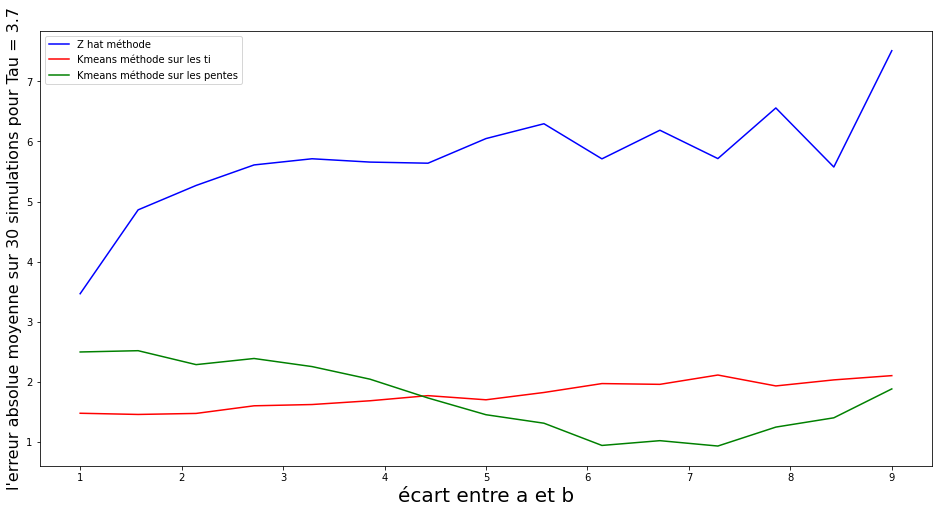

In [281]:
plt.figure(figsize = (16,8))
plt.plot(b-valeurs_a, erreur_absolue_Z, label = "Z hat méthode", color = 'blue')
plt.plot(b-valeurs_a, erreur_absolue_kmeans0, label = "Kmeans méthode sur les ti", color = 'red')
plt.plot(b-valeurs_a, erreur_absolue_kmeans, label = "Kmeans méthode sur les pentes", color = 'green')

plt.xlabel("écart entre a et b",  fontsize=20)
plt.ylabel("l'erreur absolue moyenne sur 30 simulations pour Tau = 3.7",  fontsize=16)
plt.legend()
plt.plot()

Nous remarquons que la méthode $ \hat Z $ n'est plus efficace. C'est normal étant donné que c'est une méthode mathématique qui était adaptée à notre modèle constitué de processus de Poisson mais elle n'est plus pertinente lorsqu'on utilise d'autres processus. Les deux méthodes de Kmeans ne sont pas influencées par le changement car elles n'ont pas une connaissance préalable des lois utilisées pour génerer le processus.